Chapter 5<br/>
< Data Cleansing >
===============================

[[실행 코드]](https://github.com/alstn2468/Python_For_Machine_Learning/blob/master/Chapter.5/5.ipynb)


### Data quality problems
- 데이터의 최대/최소가 다르다. -> Scale에 따른 y값에 영향
- Ordinary 또는 Normal한 값들의 표현
- 잘못 기입된 값들에 대한 처리
- 값이 없을 경우
- 극단적으로 큰 값 또는 작은 값에 대한 처리


### Data preprocessing issues
- 데이터가 빠진 경우
- 라벨링된 데이터의 데이터 처리
- 데이터의 scale의 차이가 매우 크게 날 경우



### 데이터가 존재하지 않을 때 할 수 있는 전략
- 데이터가 없으면 sample을 drop
- 데이터가 없는 최소 개수를 정해서 sample을 drop
- 데이터가 거의 없는 feature는 feature 자체를 drop
- 최빈값, 평균값으로 비어있는 데이터 채우기

In [1]:
import pandas as pd
import numpy as np

raw_data = {'first_name': ['Jason', np.nan, 'Tina', 'Jake', 'Amy'],
            'last_name': ['Miller', np.nan, 'Ali', 'Milner', 'Cooze'],
            'age': [42, np.nan, 36, 24, 73],
            'sex': ['m', np.nan, 'f', 'm', 'f'],
            'preTestScore': [4, np.nan, np.nan, 2, 3],
            'postTestScore': [25, np.nan, np.nan, 62, 70]}

df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age',
                                       'sex', 'preTestScore', 'postTestScore'])
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


### Data drop
- NaN인 데이터를 column별로 합계

In [2]:
df.isnull().sum()

first_name       1
last_name        1
age              1
sex              1
preTestScore     2
postTestScore    2
dtype: int64

- dropnan : 데이터들이 사라짐

In [3]:
df_no_missing = df.dropna()
df_no_missing

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


- 모든 데이터가 비어있으면 drop

In [4]:
df_cleaned = df.dropna(how = 'all')
df_cleaned

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


- Nan값만 들어있는 column 생성

In [5]:
df['location'] = np.nan
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


- column을 기준으로 삭제

In [6]:
df.dropna(axis = 1, how = 'all')

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


- 데이터가 최소 5개 이상 없을 때 drop

In [7]:
df.dropna(thresh = 5)

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


### 데이터 값 채우기
- 평균값, 중위값, 최빈값을 활용


### 평균값
- 해당 column의 값을 평균을 내서 채우기

In [8]:
df['preTestScore'].mean()

3.0

### 중위값
- 값을 일렬로 나열했을 때 중간에 위치한 값

In [9]:
df['postTestScore'].median()

62.0

### 최빈값
- 가장 많이 나오는 값

In [10]:
df['postTestScore'].mode()

0    25.0
1    62.0
2    70.0
dtype: float64

### Data Fill
- 데이터가 없는 곳을 0으로 지정

In [11]:
df.fillna(0)

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,0.0
1,0,0,0.0,0,0.0,0.0,0.0
2,Tina,Ali,36.0,f,0.0,0.0,0.0
3,Jake,Milner,24.0,m,2.0,62.0,0.0
4,Amy,Cooze,73.0,f,3.0,70.0,0.0


- preTestScore의 평균값을 지정

In [12]:
df['preTestScore'].fillna(df['preTestScore'].mean(), inplace = True)
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,Tina,Ali,36.0,f,3.0,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


- 성별로 나눠서 평균값을 지정

In [13]:
df['postTestScore'].fillna(df.groupby('sex')['postTestScore'].transform('mean'),
                           inplace = True)
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,Tina,Ali,36.0,f,3.0,70.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


- Age와 sex가 모두 notnull인 경우에만 표시

In [14]:
df[df['age'].notnull() & df['sex'].notnull()]

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
2,Tina,Ali,36.0,f,3.0,70.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


### 이산형 데이터 처리
- One-Hot Encoding
- {Green, Blue, Yellow} : 데이터 집합
- 실제 데이터 Set의 크기만큼 Binary Feature를 생성<br/>
{Green} -> [1, 0, 0]<br/>
{Green} -> [1, 0, 0]<br/>
{blue}  -> [0, 1, 0]

In [15]:
edges = pd.DataFrame({'source': [0, 1, 2],
                      'target': [2, 2, 3],
                      'weight': [3, 4, 5],
                      'color': ['red', 'blue', 'blue']})

edges

,color,source,target,weight
0,red,0,2,3
1,blue,1,2,4
2,blue,2,3,5


In [16]:
edges['source']

0    0
1    1
2    2
Name: source, dtype: int64

In [17]:
edges['color']

0     red
1    blue
2    blue
Name: color, dtype: object

### One-Hot Encoding

In [18]:
pd.get_dummies(edges)

,source,target,weight,color_blue,color_red
0,0,2,3,0,1
1,1,2,4,1,0
2,2,3,5,1,0


In [19]:
pd.get_dummies(edges['color'])

,blue,red
0,0,1
1,1,0
2,1,0


In [20]:
pd.get_dummies(edges[['color']])

,color_blue,color_red
0,0,1
1,1,0
2,1,0


In [21]:
weight_dict = {3 : "M", 4 : "L", 5 : "XL"}
edges["weight_sign"] = edges["weight"].map(weight_dict)
edges

,color,source,target,weight,weight_sign
0,red,0,2,3,M
1,blue,1,2,4,L
2,blue,2,3,5,XL


In [22]:
edges = pd.get_dummies(edges)
edges.as_matrix()

array([[0, 2, 3, 0, 1, 0, 1, 0],
       [1, 2, 4, 1, 0, 1, 0, 0],
       [2, 3, 5, 1, 0, 0, 0, 1]])

### 데이터 구간 나누기
- Data Binning

In [23]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks',
                         'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons',
                         'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
            'company': ['1st', '1st', '2nd', '2nd',
                        '1st', '1st', '2nd', '2nd',
                        '1st', '1st', '2nd', '2nd'],
            'name': ['Miller', 'Jacobson', 'Ali', 'Milner',
                     'Cooze', 'Jacon', 'Ryaner', 'Sone',
                     'Sloan', 'Piger', 'Riani', 'Ali'],
            'preTestScore': [4, 24, 31, 2, 3,4, 24, 31, 2, 3, 2, 3],
            'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}

df = pd.DataFrame(raw_data,
                  columns = ['regiment', 'company', 'name', 'preTestScore', 'postTestScore'])
df

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


- 구간

In [24]:
bins = [0, 25, 50, 75, 100]

- 구간명

In [25]:
group_names = ['Low', 'Okay', 'Good', 'Great']

- cut후 categories에 할당

In [26]:
categories = pd.cut(df['postTestScore'], bins, labels=group_names)
categories

0       Low
1     Great
2      Good
3      Good
4      Good
5       Low
6     Great
7      Good
8      Good
9      Good
10     Good
11     Good
Name: postTestScore, dtype: category
Categories (4, object): [Good < Great < Low < Okay]

- 기존 Dataframe에 Data할당

In [27]:
df['categories'] = pd.cut(df['postTestScore'], bins, labels=group_names)
pd.value_counts(df['categories'])

df

,regiment,company,name,preTestScore,postTestScore,categories
0,Nighthawks,1st,Miller,4,25,Low
1,Nighthawks,1st,Jacobson,24,94,Great
2,Nighthawks,2nd,Ali,31,57,Good
3,Nighthawks,2nd,Milner,2,62,Good
4,Dragoons,1st,Cooze,3,70,Good
5,Dragoons,1st,Jacon,4,25,Low
6,Dragoons,2nd,Ryaner,24,94,Great
7,Dragoons,2nd,Sone,31,57,Good
8,Scouts,1st,Sloan,2,62,Good
9,Scouts,1st,Piger,3,70,Good


### Label Encoding by sklearn
- Scikit-learn의 preprocessing 패기지
- label, one-hot 지원

In [28]:
raw_example = df.as_matrix()
raw_example[:3]

array([['Nighthawks', '1st', 'Miller', 4, 25, 'Low'],
       ['Nighthawks', '1st', 'Jacobson', 24, 94, 'Great'],
       ['Nighthawks', '2nd', 'Ali', 31, 57, 'Good']], dtype=object)

In [29]:
data = raw_example.copy()

- Encoder 생성

In [30]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

- Data에 맞게 encoding fitting

In [31]:
le.fit(raw_example[:,0])

LabelEncoder()

- 실제 데이터 -> labelling data

In [32]:
le.transform(raw_example[:,0])

array([1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2])

- label encoder의 fit과 transform의 과정이 나눠진 이유는<br/>
새로운 데이터 입력시, 기존 labelling 규칙을 그대로 적용할 필요성
- Fit은 규칙을 생성하는 과정
- Transform은 규칙을 적용하는 과정
- Fit을 통해 규칙이 생성된 labelencoder는 따로 저장하여<br/>
새로운 데이터를 입력할 경우 사용 가능
- Encoder들을 실제 시스템에 사용할 경우 pickle화 필요

#### 기존 label encoder를 따로 저장

In [33]:
label_column = [0, 1, 2, 5]
label_enconder_list = []

for column_index in  label_column :
    le = preprocessing.LabelEncoder()
    le.fit(raw_example[:, column_index])
    data[:,column_index] = le.transform(raw_example[:, column_index])
    label_enconder_list.append(le)
    del le 
    
data[:3]

array([[1, 0, 4, 4, 25, 2],
       [1, 0, 2, 24, 94, 1],
       [1, 1, 0, 31, 57, 0]], dtype=object)

#### 저장된 le로 새로운 데이터에 적용

In [34]:
label_enconder_list[0].transform(raw_example[:10, 0])

array([1, 1, 1, 1, 0, 0, 0, 0, 2, 2])

### One-Hot Encoding by sklearn
- Numeric labelling이 완료된 데이터에 one-hot 적용
- 데이터는 1-dim으로 변환하여 넣어줄 것을 권장

In [35]:
one_hot_enc = preprocessing.OneHotEncoder()

- 1-dim으로 변환하여 fit

In [36]:
one_hot_enc.fit(data[:, 0].reshape(-1, 1))

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

- 1-dim 변환 후 transform -> ndarray

In [37]:
onehotlabels = one_hot_enc.transform(data[:, 0].reshape(-1, 1)).toarray()
onehotlabels

array([[ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.]])

### Feature scaling
- Feature간의 최대-최소값의 차이를 맞춘다.
- 𝑦 = β₁Χ₁ + β₂Χ₂ + Χ₀


### Min-Max Normalization
- 기존 변수에 범위를 새로운 최대-최소로 변경
- 일반적으로 0과 1 사이의 값으로 변경


### Standardization (z-score Normalization)
- 기존 변수에 범위를 정규 분포로 반환
- 실제 Min-Max값을 모를 때 활용


### 주의사항
- 실제 사용할 때에는 반드시 정규화 Parameter(최대/최소, 평균/표준편차)등을<br/>
기억하여 새로운 값에 적용


### Min-Max Normalization

In [38]:
df = pd.DataFrame({'A' : [14.00, 90.20, 90.95, 96.27, 91.21],
                   'B' : [103.02, 107.26, 110.35, 114.23, 114.68],
                   'C': ['big','small', 'big', 'small', 'small']})
df

,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small


In [39]:
df['A'] = (df['A'] - df['A'].min() ) \
/ (df['A'].max() - df['A'].min()) * (5 - 1) + 1

df

,A,B,C
0,1.000000,103.02,big
1,4.704874,107.26,small
2,4.741339,110.35,big
3,5.000000,114.23,small
4,4.753981,114.68,small


### z-score Normalization

In [40]:
df['B'] = (df['B'] - df['B'].mean())  \
/ (df['B'].std() )

df

,A,B,C
0,1.000000,-1.405250,big
1,4.704874,-0.540230,small
2,4.741339,0.090174,big
3,5.000000,0.881749,small
4,4.753981,0.973556,small


### Feature Scaling Function

In [41]:
def feture_scaling(df, scaling_strategy = "min-max", column = None) :
    if column == None :
        column = [column_name for column_name in df.columns]
        
    for column_name in column :
        if scaling_strategy == "min-max" :
            df[column_name] = (df[column_name] - df[column_name].min()) \
                                / (df[column_name].max() - df[column_name].min()) 
            
        elif scaling_strategy == "z-score" :
            df[column_name] = (df[column_name] \
                               - df[column_name].mean()) \
                                / (df[column_name].std() )
    return df

In [42]:
df = pd.DataFrame({'A' : [14.00, 90.20, 90.95, 96.27, 91.21],
                   'B':[103.02, 107.26, 110.35, 114.23, 114.68],
                   'C':['big','small', 'big', 'small', 'small']})
df

,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small


In [43]:
feture_scaling(df, column = ['A', 'B'])

,A,B,C
0,0.000000,0.000000,big
1,0.926219,0.363636,small
2,0.935335,0.628645,big
3,1.000000,0.961407,small
4,0.938495,1.000000,small


### Feature Scaling with sklearn
- Label encoder와 마찬가지로, sklearn도 feature scale 지원
- MinMaxScaler와 StandardScaler 사용

In [44]:
from sklearn import preprocessing

df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
     header = None,
     usecols = [0, 1, 2]
    )
df.columns = ['Class label', 'Alcohol', 'Malic acid']
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
5,1,14.20,1.76
6,1,14.39,1.87
7,1,14.06,2.15
8,1,14.83,1.64
9,1,13.86,1.35


In [48]:
std_scaler = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])
df_std = std_scaler.transform(df[['Alcohol', 'Malic acid']])
df_std[:5]

array([[ 1.51861254, -0.5622498 ],
       [ 0.24628963, -0.49941338],
       [ 0.19687903,  0.02123125],
       [ 1.69154964, -0.34681064],
       [ 0.29570023,  0.22769377]])

- Preprocessing과정은 모두 fit->transform의 과정
- 이유는 label encoder와 동일
- 단, scaler는 한 번에 여러 column 처리 가능

In [49]:
minmax_scaler = preprocessing.MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
df_minmax = minmax_scaler.transform(df[['Alcohol', 'Malic acid']])

df_minmax[:3]

array([[ 0.84210526,  0.1916996 ],
       [ 0.57105263,  0.2055336 ],
       [ 0.56052632,  0.3201581 ]])

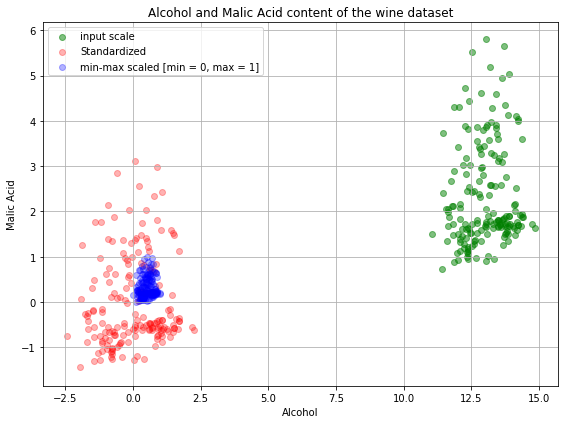

In [52]:
from matplotlib import pyplot as plt
% matplotlib inline

def plot() : 
    plt.figure(figsize = (8, 6))

    plt.scatter(df['Alcohol'], df['Malic acid'],
                color = 'green', label = 'input scale',
                alpha = 0.5)

    plt.scatter(df_std[:, 0], df_std[:, 1], color = 'red',
                label = 'Standardized', alpha = 0.3)

    plt.scatter(df_minmax[:, 0], df_minmax[:, 1],
                color = 'blue', label = 'min-max scaled [min = 0, max = 1]',
                alpha = 0.3)

    plt.title('Alcohol and Malic Acid content of the wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

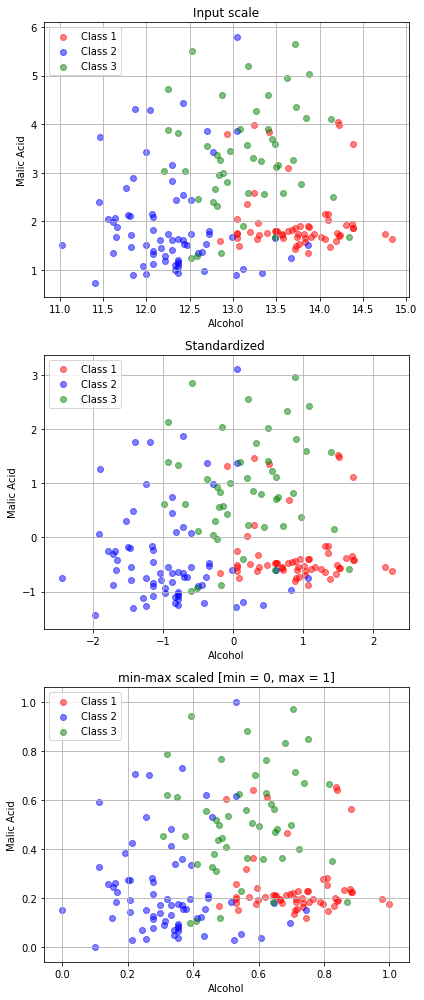

In [53]:
fig, ax = plt.subplots(3, figsize = (6, 14))

for a,d,l in zip(range(len(ax)),
               (df[['Alcohol', 'Malic acid']].values, df_std, df_minmax),
               ('Input scale', 'Standardized ', 'min-max scaled [min = 0, max = 1]')) :
    for i,c in zip(range(1,4), ('red', 'blue', 'green')) :
        ax[a].scatter(d[df['Class label'].values == i, 0],
                  d[df['Class label'].values == i, 1],
                  alpha = 0.5,
                  color = c,
                  label = 'Class %s' % i)
        
    ax[a].set_title(l)
    ax[a].set_xlabel('Alcohol')
    ax[a].set_ylabel('Malic Acid')
    ax[a].legend(loc = 'upper left')
    ax[a].grid()

plt.tight_layout()
plt.show()